#5.Develop a program to implement k-Nearest Neighbour algorithm to classify the randomly generated 100 values of x in the range of [0,1]. Perform the following based on dataset generated.

1.   Label the first 50 points {x1,……,x50} as follows: if (xi ≤ 0.5), then xi ∊
Class1, else xi ∊ Class1
2.   Classify the remaining points, x51,……,x100 using KNN. Perform this
for k=1,2,3,4,5,20,30


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
data = np.random.rand(100)

train_data = data[:50]
train_labels = ['class1' if x<=0.5 else 'class2' for x in train_data]

test_data = data[50:]
k_values = {1,2,3,4,5,20,30}

In [5]:
def knn(data, labels, test_point, k):
  distances = [(abs(xi-test_point),label) for xi, label in zip(data, labels)]
  distances.sort(key=lambda x: x[0])

  k_label = [label for _, label in distances[:k]]
  return Counter(k_label).most_common(1)[0][0]


In [ ]:
result = {}
for k in k_values:
  pred_label = [knn(train_data, train_labels, test_point, k) for test_point in test_data]
  result[k] = pred_label

  print(f"result for k = {k} : {pred_label}")

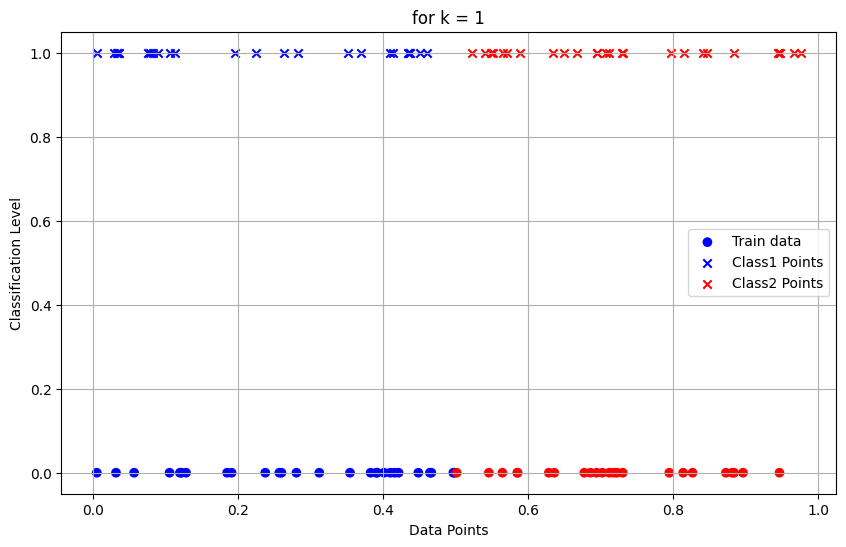

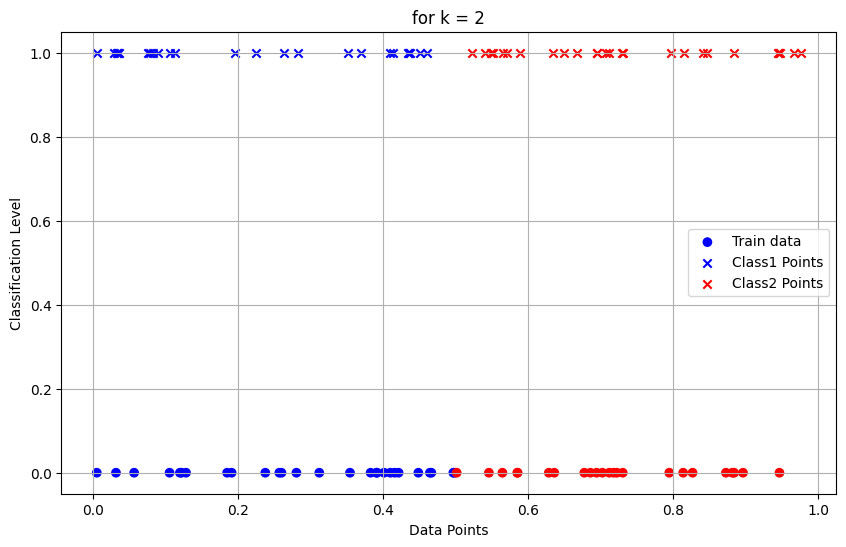

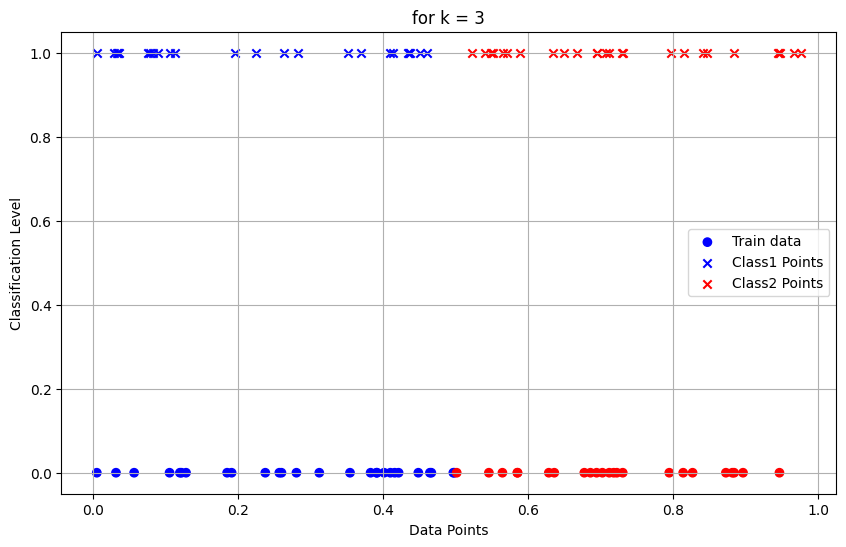

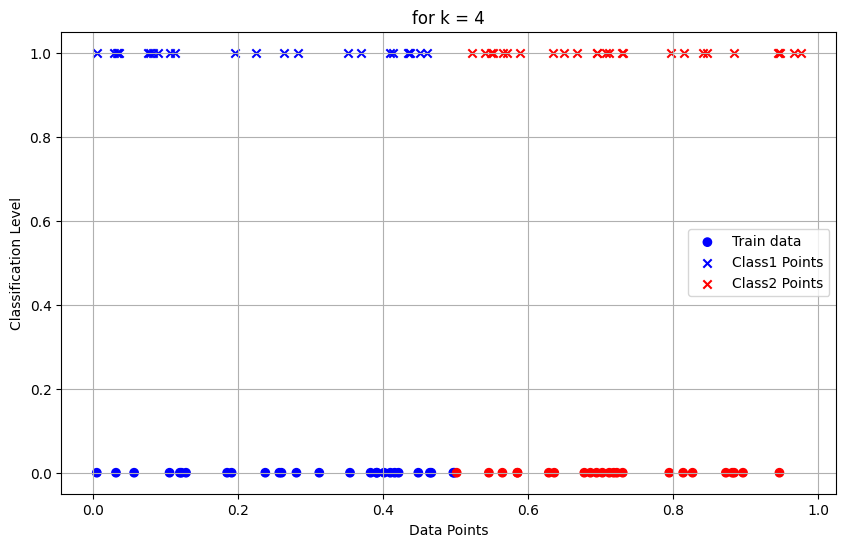

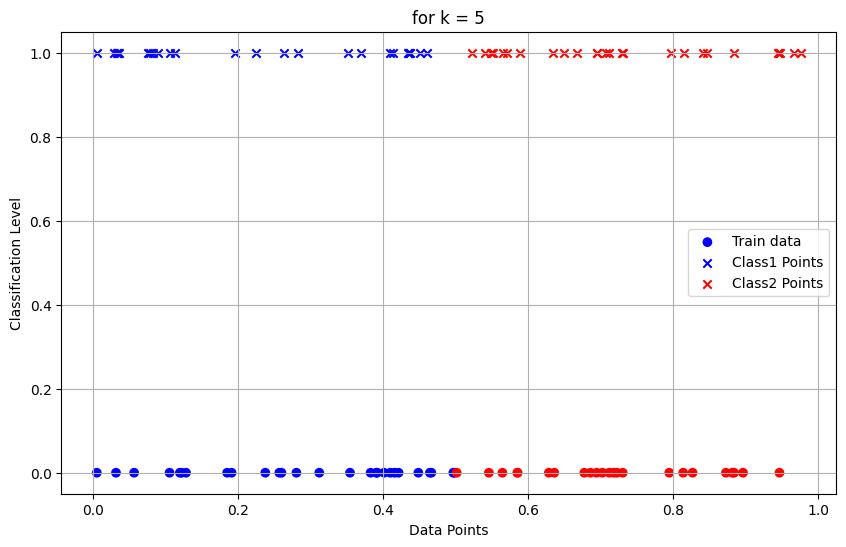

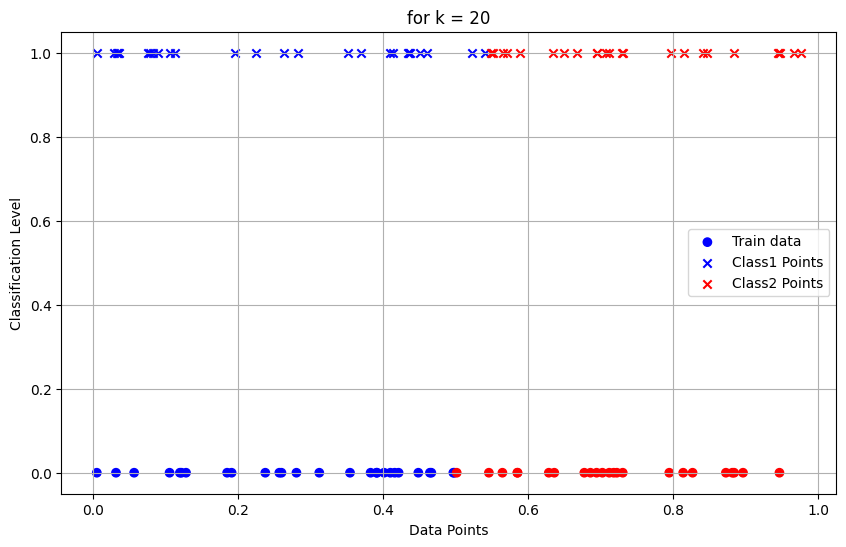

In [21]:
for k in k_values:
  classified_label = result[k]
  class1_points = [x for x, label in zip(test_data, classified_label) if label =='class1' ]
  class2_points = [x for x, label in zip(test_data, classified_label) if label =='class2' ]

  plt.figure(figsize=(10, 6))
  colors = ["blue" if label =="class1" else "red" for label in train_labels]
  plt.scatter(train_data, [0]*len(train_data), c=colors, marker='o',label="Train data")
  plt.scatter(class1_points, [1]*len(class1_points) , c="blue", marker='x', label="Class1 Points")
  plt.scatter(class2_points, [1]*len(class2_points) , c="red", marker='x', label="Class2 Points")
  plt.title(f"for k = {k}")
  plt.xlabel("Data Points")
  plt.ylabel("Classification Level")
  plt.legend()
  plt.grid(True)
  plt.show()